## 데이터 가정에 따른 시계열 모형

- 시계열 자료는 추세변동, 계절변동 등 크고 작은 다양한 변동요인이 다중적으로 중첩되어 있다.
- 이러한 시계열 데이터의 분석을 수행할 때는 크게 2가지 접근으로 나눌 수 있다.
  - 내포된 변동요인이 고정적 패턴을 보이는 경우: 요소분해법
  - 다양한 변동요인이 고정적 패턴을 보이지 않는 경우: (지수)평활법
- 분석모형에 따라 추정된 추정값과 관측값과의 차이인 **잔차의 시계열** 자료(Residual Error Series)는 확률과정으로 나타낼 수 있다.
- 이때 고려되는 것이 확률모형(Stochastic Model)이다.
  - **시계열 분석에서 모형이 잘 적합될 때 잔차의 시계열 자료는 백색잡음(white noise)이 된다**
  - x_t = y_t - ^y_t =~ N(0, σ^2)
  - 즉, 잔차는 **서로 독립**이다

- 확률모형의 분석은 다음의 4가지 단계를 걸쳐 수행된다

  - 모형 설정(Model Identification): ACF, PACF 같은 지표와 `auto.arima`와 같은 프로그램을 이용하여 시계열 자료에 적합한 모형을 선택
  - 모수 추정(Parameter Estimation): 설정한 모형에 따라 모수(계수)를 추정하고 적합성을 검토
  - 분석결과의 검정(Statistical Testing): 모형 적합도에 따른 잔차의 정상성 및 분석결과 검정을 수행
  - 예측(Forecasting): 시계열 자료와 분석모형을 토대로 미래 값을 예측

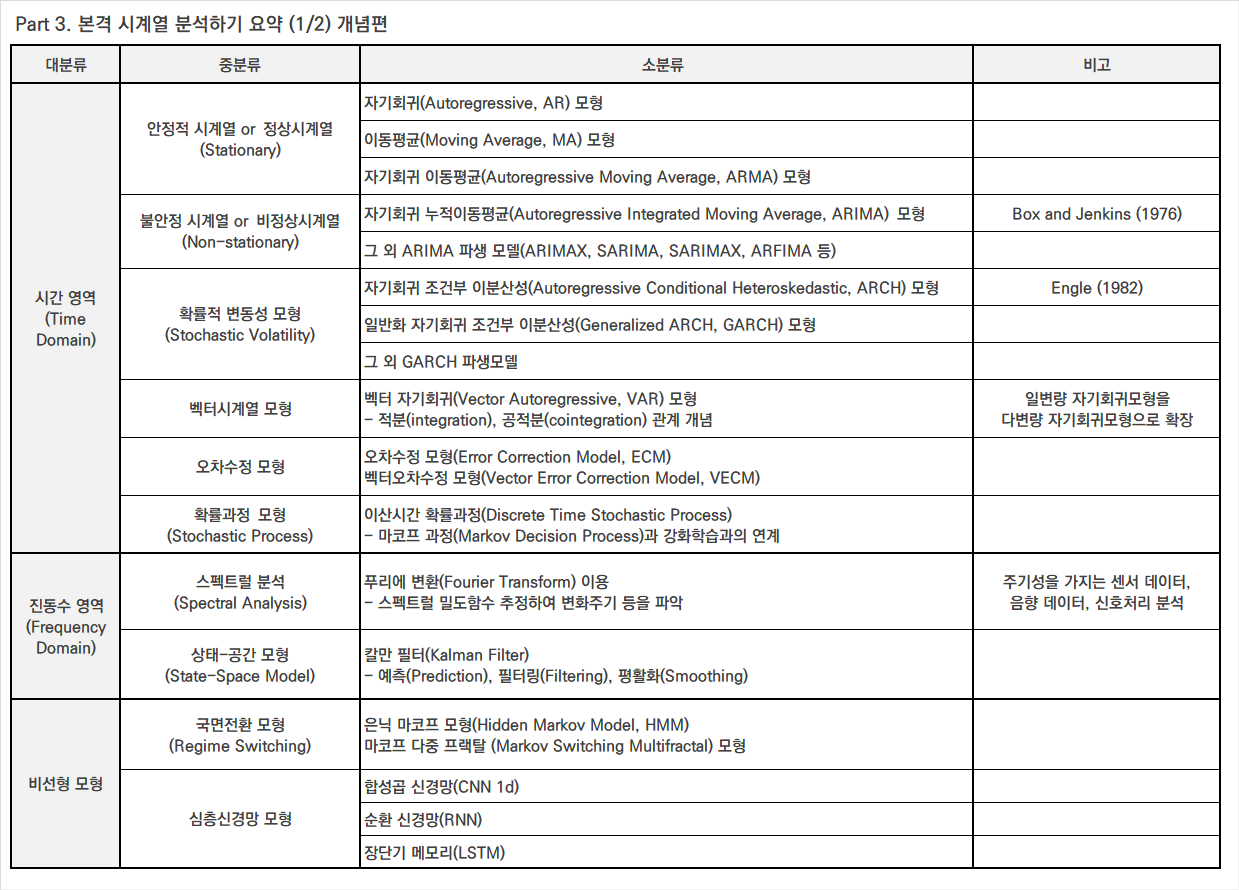

* 오차수정 모형: 두 변수간 장기적 관계가 존재할 때 이들 관계를 회귀모형으로 추정하면, 불안정 시계열의 선형결합이 안정적 시계열이 됨

### <span style='color:RGB(152,238,152);'>자기상관 함수(Auto Correlation Function, ACF)</span>

- 동일한 변수를 시점을 달리하여 관측했을 때 시점에 따라 다른 값 사이의 상호 연관관계를 나타내는 척도
- 연속적인 관측값 사이의 상호 연관관계
- 시계열 자료에서 time별 signal과 time lag별 signal의 유사성을 토대로 시계열 자료의 정상성 파악
- ACF 그래프는 정상 시계열일 경우 0으로 빠르게 떨어지고, 비정상 시계열은 천천히 떨어진다
    - ACF가 느리게 감소한다 -> 정상성을 띄지 않는다
    - ACF가 급격히 cut-off되면 -> 정상성을 띈다

### <span style='color:RGB(152,238,152);'>부분자기상관 함수(Partial ACF, PACF)</span>

  - 산정하고자 하는 연속적인 2개의 시계열 자료에서 상관계수를 구함
  - 산정하고자 하는 두 변수를 제외한 **모든 변수의 영향을 제거한 상태**에서의 **두 변수간 존재하는 순수한 상관계수**를 산정하여 정상성 검정
  - 즉 y_t와 y_t-k 간의 순수한 상관관계
  - 두 지점 사이에 포함된 모든 y_t-1, y_t-2, ..., y_t-k+1 의 영향을 제거된다
  - 시계열 자료가 정상성인 경우, 자기상관 함수와 부분자기상관 함수 모두 각 시차에서 신뢰한계(일반적으로 표준편차의 2배)의 범위 내에 존재하는 것으로 나타남
    - AR(p) : ACF 가 완만하게 감소, PACF가 갑자기 cut-off
    - MR(q) : ACF가 cut-off , PACF가 완만하게 감소
    - ARMA(p,q) : ACF, PACF가 완만하게 감소

    * p,q값에 주관이 들어갈 수 있다

### <span style='color:RGB(152,238,152);'>### AIV,BIC조정 결정 계수 (Adjusted determination coefficient)</span>

- AIC (Akaike Information Criterion)  
    - L: likly 우도(확률)
    - p: AR에서 p,즉 변수의 개수(feature의 개수)---> 규제
    - AIC=−2logL+2K
    - AIC는 nlog(RSS/n) + 2p
    - 작을 수록 좋다
    - p의 개수(피쳐의 개수)를 구하는 지표


- BIC (Bayesian Information Criterion) 
    - n:데이터의 개수
    - BIC=−2logL+Klogn
    - BIC는 nlog(RSS/n) +plog(n)
    - 작을수록 좋다
    - 데이터의 개수를 조절할때 쓰는 지표

### <font color="green">자기회귀(AR, Autoregressive Model)</font>

- 변수의 과거 값의 선형 조합을 이용하여 관심 있는 변수를 예측
- 자기 자신에 대한 변수의 회귀 
- (선형회귀) y = a + b1 * X_1 + ... + bp * X_p + ε
- (자기회귀) y_t = c + Φ1 * y_t-1 + Φ2 * y_t-2 + ... + Φp * y_t-p + ε_t
- AR(1)에서는 -1<Φ<1 조건 필수
- AR(p) : p차 자기회귀 모형
- ε_t 은 평균이 0이고 분산이 1인 정규 분포를 따르는 백색잡음

### <font color="green">이동평균(MA)</font>
- 예측 오차를 이용하여 미래를 예측
- MA(q): q차 이동평균 모형
- y_t = c + Θ1 * ε_t-1 + Θ2 * ε_t-2 + ... + Θq * ε_t-q + ε_t

### <font color="green">안정 시계열(ARMA)</font>

- p개의 자기 자신의 과거값과 q개의 과거 백색 잡음의 선형 조합
- AR(p) 모형의 정상성, MA(q) 모형의 가역성 조건을 만족해야 함
- ARMA(p, q)
- y_t = AR(p) + MA (q)
- y_t = Φ1 * y_t-1 + Φ2 * y_t−2 + ... + Φp * y_t−p + ϵ_t + Θ1 * ϵ_t−1 + Θ2 * ϵ_t−2 + ... + Θq * ϵ_t−q
- ARMA(1, 0) = AR(1)
- ARMA(0, 1) = MA(1)
- ARMA(1, 1)

### <font color="green">불안정 시계열(ARIMA))</font>

- ARIMA(p, d, q) : d차 차분한 데이터에 AR(p) 모형과 MA(q) 모형을 합친 모형
- ARIMA 모형에서 “I” 는 누적(integrated) 을 의미한다
- 이는 비정상(non-stationary) 시계열을 정상(stationary) 시계열로 만들기 위해서 필요한 차분의 횟수를 의미한다
- ARIMA(p, 0, 0) = AR(p)
- ARIMA(0, 0, q) = MA(q)
- p, d, q 값은 AIC, BIC, 그리고 경험적인 자기상관 등 다양한 방법을 통해서 선택할 수 있다
- 자기상관은 ACF 와 PACF 그래프를 그려서 확인한다
- 시계열 데이터가 AR의 특성을 띄는 경우, ACF는 천천히 감소하고 PACF 는 처음 시차를 제외하고 급격히 감소
- 시계열 데이터가 MA의 특성을 띄는 경우, ACF는 급격히 감소하고 PACF는 천천히 감소

| 확률과정 모델     |        ACF           |      PACF       |
|--------|:----------------------:|:------------------------:|
| AR(p) | 점차 감소하여 0에 접근 | 시차 p 이후 0 |
| MA(q) | 시차 q 이후 0 | 점차 감소하여 0에 접근    |
| ARMA(p, q) | 점차 감소하여 0에 접근 (시차 q 이후 0)   | 점차 감소하여 0에 접근 (시차 p 이후 0)  |

![사진](https://velog.velcdn.com/images%2Feuisuk-chung%2Fpost%2F93fc60aa-a9fc-48b8-bec8-5230b597fd95%2Fimage.png)

![차분사진](https://velog.velcdn.com/images%2Feuisuk-chung%2Fpost%2Fd42f56b6-7245-414b-915d-e20c4142eceb%2Fimage.png)